<a href="https://colab.research.google.com/github/Podinis/Pyhton_10810/blob/main/Sessao7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1 Importar bibliotecas principais

In [1]:
!pip install deep-translator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from transformers import pipeline

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from deep_translator import GoogleTranslator

2.2 Ler o dataset (por exemplo: imdb-reviews.csv com colunas review e sentiment)

In [5]:
file = files.upload()

dataFrame = pd.read_csv("imdb-reviews.csv")
print (dataFrame.head(10))


Saving imdb-reviews.csv to imdb-reviews (7).csv
                                              review  label
0  Muito divertido e envolvente. Não consegui par...      1
1               Os personagens não são convincentes.      0
2  Adorei o enredo, muito emocionante e bem dirig...      1
3                  Muito entediante. Quase adormeci.      0
4  Este filme foi maravilhoso! Ótima história e a...      1
5                 Péssimo filme. Uma perda de tempo.      0
6         Uma obra-prima! Definitivamente recomendo.      1
7               Os personagens não são convincentes.      0
8  Surpreendente e inspirador. Um filme para lemb...      1
9                 Péssimo filme. Uma perda de tempo.      0


In [6]:

# 🌐 Traduz cada review usando Google Translate
dataFrame['review'] = dataFrame['review'].apply(lambda x: GoogleTranslator(source='pt', target='en').translate(x))
# 📤 Guarda em novo ficheiro CSV
dataFrame.to_csv('imdb-reviews-en.csv', index=False)
print("✅ Ficheiro 'imdb-reviews-en.csv' criado com sucesso!")

✅ Ficheiro 'imdb-reviews-en.csv' criado com sucesso!


In [7]:
dataFrame = pd.read_csv("imdb-reviews-en.csv")
print (dataFrame.head(10))

                                              review  label
0   Very fun and engaging. I couldn't stop watching.      1
1                 The characters are not convincing.      0
2  I loved the plot, very exciting and well direc...      1
3                 Very boring. I almost fell asleep.      0
4  This movie was wonderful! Great story and impe...      1
5                        Bad movie. A waste of time.      0
6             A masterpiece! I definitely recommend.      1
7                 The characters are not convincing.      0
8     Surprising and inspiring. A movie to remember.      1
9                        Bad movie. A waste of time.      0


In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


2.3 Verificar dados nulos e número de classes

In [9]:
print(dataFrame.isnull().sum())

print (dataFrame['label'].value_counts())

# Eliminar valores nulos, se houver
dataFrame = dataFrame.dropna()


review    0
label     0
dtype: int64
label
1    500
0    500
Name: count, dtype: int64


## Parte 3: Análise Exploratória <br>

3.1 Criar gráfico de distribuição de sentimentos

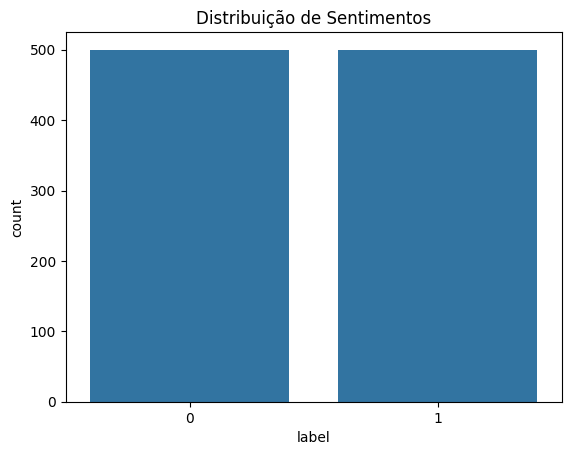

In [10]:
sns.countplot(data=dataFrame, x="label")
plt.title("Distribuição de Sentimentos")
plt.show()

3.2 Contar palavras e verificar reviews mais longas

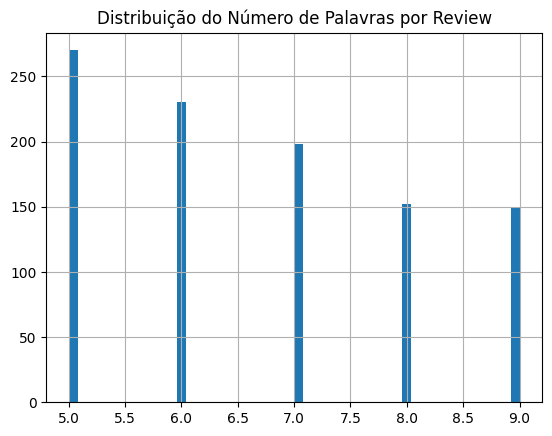

In [11]:
dataFrame["word_count"] = dataFrame["review"].apply(lambda x: len(str(x).split()))
dataFrame["word_count"].hist(bins=50)
plt.title("Distribuição do Número de Palavras por Review")
plt.show()

## Parte 4: Clustering com TF-IDF <br>

4.1 Importar e aplicar TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(dataFrame["review"])

4.2 Aplicar KMeans

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)
dataFrame['cluster'] = clusters

# Adicionar os rótulos de cluster ao DataFrame
dataFrame['cluster'] = kmeans.labels_


# Verificar correspondência entre clusters e sentimentos reais
print(pd.crosstab(dataFrame['cluster'], dataFrame['label']))

label      0    1
cluster          
0        441  406
1         59   94


In [14]:
dataFrame.head(10)

,review,label,word_count,cluster
0,Very fun and engaging. I couldn't stop watching.,1,8,0
1,The characters are not convincing.,0,5,0
2,"I loved the plot, very exciting and well direc...",1,9,0
3,Very boring. I almost fell asleep.,0,6,0
4,This movie was wonderful! Great story and impe...,1,9,1
5,Bad movie. A waste of time.,0,6,0
6,A masterpiece! I definitely recommend.,1,5,0
7,The characters are not convincing.,0,5,0
8,Surprising and inspiring. A movie to remember.,1,7,0
9,Bad movie. A waste of time.,0,6,0


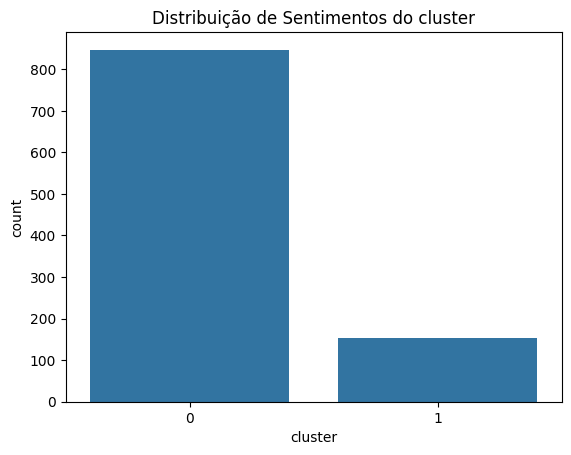

In [15]:
sns.countplot(data=dataFrame, x="cluster")
plt.title("Distribuição de Sentimentos do cluster")
plt.show()

## Parte 5: Classificação com Transformer <br>

5.1 Importar pipeline da Hugging Face

In [16]:
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


5.2 Aplicar o modelo a algumas frases

In [17]:
exemplos = dataFrame["review"].sample(5).tolist()

print ("Exemplos de reviews:")
for frase in exemplos:
    print(frase)

print('\n#######################\n')
for frase in exemplos:
    resultado = classifier(frase)
    print(f"\nReview: {frase[:100]}...")
    print("Classificação:", resultado[0])

Exemplos de reviews:
Surprising and inspiring. A movie to remember.
Well written script and memorable scenes.
Very fun and engaging. I couldn't stop watching.
Horrible performances and predictable plot.
Very weak. The story makes no sense.

#######################


Review: Surprising and inspiring. A movie to remember....
Classificação: {'label': 'POSITIVE', 'score': 0.9998881816864014}

Review: Well written script and memorable scenes....
Classificação: {'label': 'POSITIVE', 'score': 0.9998745918273926}

Review: Very fun and engaging. I couldn't stop watching....
Classificação: {'label': 'POSITIVE', 'score': 0.9998819828033447}

Review: Horrible performances and predictable plot....
Classificação: {'label': 'NEGATIVE', 'score': 0.999822199344635}

Review: Very weak. The story makes no sense....
Classificação: {'label': 'NEGATIVE', 'score': 0.9998039603233337}


### Tarefa Final: Comparar os dois métodos<br>

<b>Qual método teve resultados mais coerentes?</b> <br>
  O método do dataset

<b>Os clusters batem certo com os sentimentos reais? </b> <br>
  Não

<b>O modelo pré-treinado conseguiu generalizar bem para este dataset? </b> <br>
  Penso que não ele tornou quase todas as reviews como negativas

6 - Grafico com as palavras mais usadas nas reviews

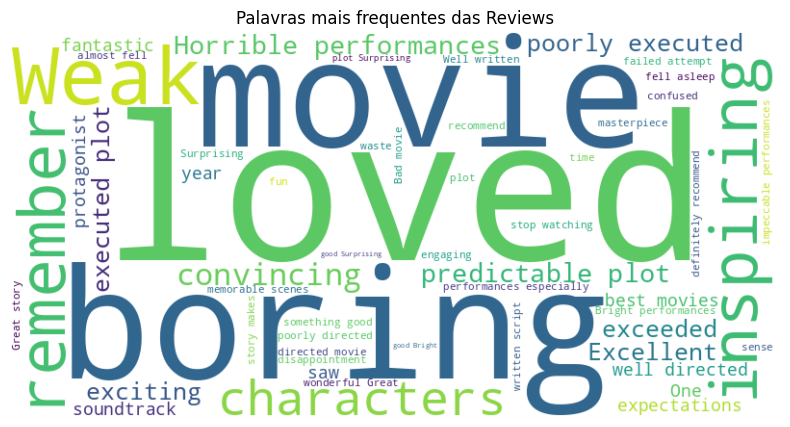

In [19]:
texto =' '.join(dataFrame['review'])

stopwords =set(STOPWORDS)
stopwords.update(['de','e','da','ao'])

wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white'
).generate(texto)

plt.figure(figsize=(10,5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes das Reviews')
plt.show()